[*********************100%%**********************]  1 of 1 completed


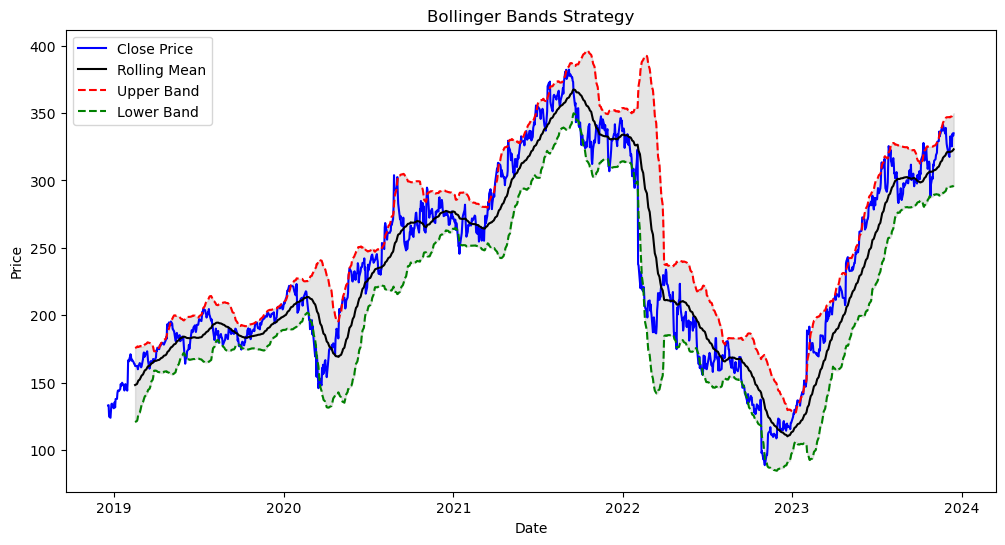

            Signal
Date              
2018-12-19     0.0
2018-12-20     0.0
2018-12-21     0.0
2018-12-24     0.0
2018-12-26     0.0
...            ...
2023-12-11     0.0
2023-12-12     0.0
2023-12-13     0.0
2023-12-14     0.0
2023-12-15     0.0

[1257 rows x 1 columns]


In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

def fetch_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

def calculate_bollinger_bands(data, window=40, num_std_dev=2):
    data['Rolling Mean'] = data['Close'].rolling(window=window).mean()
    data['Upper Band'] = data['Rolling Mean'] + (data['Close'].rolling(window=window).std() * num_std_dev)
    data['Lower Band'] = data['Rolling Mean'] - (data['Close'].rolling(window=window).std() * num_std_dev)
    return data

def plot_bollinger_bands(data):
    plt.figure(figsize=(12, 6))
    plt.plot(data['Close'], label='Close Price', color='blue')
    plt.plot(data['Rolling Mean'], label='Rolling Mean', color='black')
    plt.plot(data['Upper Band'], label='Upper Band', color='red', linestyle='dashed')
    plt.plot(data['Lower Band'], label='Lower Band', color='green', linestyle='dashed')
    plt.fill_between(data.index, data['Upper Band'], data['Lower Band'], color='gray', alpha=0.2)
    plt.title('Bollinger Bands Strategy')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

def bollinger_band_strategy(data):
    signals = pd.DataFrame(index=data.index)
    signals['Signal'] = 0.0

    # Buy Signal
    signals['Signal'][data['Close'] < data['Lower Band']] = 1.0

    # Sell Signal
    signals['Signal'][data['Close'] > data['Upper Band']] = -1.0

    return signals

if __name__ == "__main__":
    # Define the stock ticker, start date, and end date
    stock_ticker = 'META'
    start_date = '2018-12-19'
    end_date = '2023-12-18'

    # Fetch historical stock data
    stock_data = fetch_data(stock_ticker, start_date, end_date)

    # Calculate Bollinger Bands
    stock_data = calculate_bollinger_bands(stock_data)

    # Plot Bollinger Bands
    plot_bollinger_bands(stock_data)

    # Generate signals based on Bollinger Bands
    signals = bollinger_band_strategy(stock_data)

    # Print signals
    print(signals)


In [2]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler


In [4]:
# Create features and labels
X = stock_data[['Close', 'Rolling Mean', 'Upper Band', 'Lower Band']]
y = stock_data['Signal']


KeyError: 'Signal'

In [ ]:
# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:
y_train.shape

In [ ]:
y_test.shape

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Instantiate a StandardScaler instance
scaler = StandardScaler()

# Fit the training data to the standard scaler
X_scaler = scaler.fit(X_train)

# Transform the training data using the scaler
X_train_scaled = X_scaler.transform(X_train)

# Transform the testing data using the scaler
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
# Import the RandomForestClassifier from sklearn
from sklearn.ensemble import RandomForestClassifier

# Instantiate a RandomForestClassifier instance
model = RandomForestClassifier()

# Fit the traning data to the model
model.fit(X_train_scaled, y_train)

In [ ]:
# Initialize and fit the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=50, random_state=42)
rf_classifier.fit(X_train, y_train)


In [ ]:
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)


In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


In [ ]:
# Display classification report
print('Classification Report:')
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
